To continue the analysis, we will use the package Fanalysis, developed by Olivier Garcia
https://github.com/OlivierGarciaDev/fanalysis.
We want to do a Multivariate Analysis in order to identify different association between variable.

In [1]:
pip install fanalysis


The following command must be run outside of the IPython shell:

    $ pip install fanalysis

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install fanalysis

In [3]:
import pandas as pd
from fanalysis.mca import MCA
%matplotlib inline

In [23]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd

# Read data from file 'filename.csv' 
df = pd.read_csv("C:\\Users\\William\\Documents\\Data Science - ML\\Projects ML\\Project Kaggle - Students Performance in Exams\\StudentsPerformance.csv")
df['avg_score'] = round(df[['math score','reading score','writing score']].sum(axis=1)/3,1)

# Setting the cut-off
def test(data):
    if data['avg_score'] >= 70:
        return "passed"
    else:
        return "failed"

df['result'] = df.apply(test, axis=1)

# Discretization of the continuous variable
def discretization(x):
    
    if x <= 25:
        return "[0:25]" 
    elif x <= 50:
        return "[26:50]"
    elif x < 70:
        return "[51:69]"
    elif x <= 85:
        return "[70:85]"
    else:
        return "+85"
    
df["avg_score_d"]=df['avg_score'].apply(discretization)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,result,avg_score_d
0,male,group D,high school,free/reduced,completed,64,64,67,65.0,failed,[51:69]
1,male,group C,master's degree,free/reduced,completed,46,42,46,44.7,failed,[26:50]
2,female,group B,some college,free/reduced,completed,65,75,70,70.0,passed,[70:85]
3,male,group B,some college,free/reduced,completed,59,65,66,63.3,failed,[51:69]
4,female,group A,associate's degree,standard,completed,55,65,62,60.7,failed,[51:69]


We did a simple categorization on the avg_score, taking 5 casula range from lowest quantile to excellent.

In [21]:
# We check the consistency by a quick crosstab
check_table=pd.crosstab(df['result'],df['avg_score_d'])
print(check_table)

avg_score_d  +85  [0:25]  [26:50]  [51:69]  [70:85]
result                                             
failed         0       4      105      432        0
passed       112       0        0        0      347


In [24]:
# Delete the quantitatives variables
df=df.drop(["math score","reading score","writing score","avg_score","result"],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg_score_d
0,male,group D,high school,free/reduced,completed,[51:69]
1,male,group C,master's degree,free/reduced,completed,[26:50]
2,female,group B,some college,free/reduced,completed,[70:85]
3,male,group B,some college,free/reduced,completed,[51:69]
4,female,group A,associate's degree,standard,completed,[51:69]


In [30]:
# The use of the package recquires to transform the df into a matrix
X = df.iloc[:, 0:6].as_matrix()
print(X)

[['male' 'group D' 'high school' 'free/reduced' 'completed' '[51:69]']
 ['male' 'group C' "master's degree" 'free/reduced' 'completed' '[26:50]']
 ['female' 'group B' 'some college' 'free/reduced' 'completed' '[70:85]']
 ...
 ['male' 'group D' 'some high school' 'standard' 'none' '[70:85]']
 ['female' 'group C' 'some high school' 'standard' 'none' '[70:85]']
 ['female' 'group D' 'some college' 'free/reduced' 'none' '[70:85]']]


C:\Users\William\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [31]:
# Instanciation
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:6])

In [32]:
# Model estimation with the fit method on the data X.
my_mca.fit(X)

MCA(n_components=None,
  row_labels=array([  0,   1, ..., 998, 999], dtype=int64), stats=True,
  var_labels=array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'avg_score_d'], dtype=object))

At this stage, we start printing the results we need.

I - Eigen value analysis

In [33]:
# Representation of the eigen values
print(my_mca.eig_)

[[2.56268534e-01 1.94592845e-01 1.87440101e-01 1.83462121e-01
  1.82133014e-01 1.73501930e-01 1.70901357e-01 1.67628298e-01
  1.65821167e-01 1.60458763e-01 1.59313803e-01 1.54400146e-01
  1.44857181e-01 1.41047260e-01 1.36281195e-01 8.85589517e-02]
 [9.61007001e+00 7.29723168e+00 7.02900379e+00 6.87982954e+00
  6.82998804e+00 6.50632236e+00 6.40880088e+00 6.28606118e+00
  6.21829376e+00 6.01720363e+00 5.97426760e+00 5.79000547e+00
  5.43214430e+00 5.28927224e+00 5.11054482e+00 3.32096069e+00]
 [9.61007001e+00 1.69073017e+01 2.39363055e+01 3.08161350e+01
  3.76461231e+01 4.41524454e+01 5.05612463e+01 5.68473075e+01
  6.30656012e+01 6.90828049e+01 7.50570725e+01 8.08470779e+01
  8.62792222e+01 9.15684945e+01 9.66790393e+01 1.00000000e+02]]


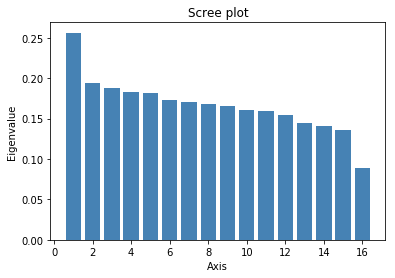

In [34]:
# Graph of the eigen values
my_mca.plot_eigenvalues()

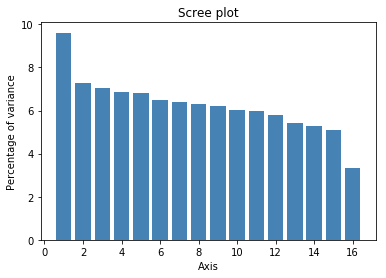

In [35]:
my_mca.plot_eigenvalues(type="percentage")

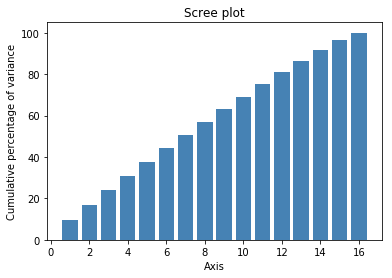

In [36]:
my_mca.plot_eigenvalues(type="cumulative")

II - Statistics extraction on the dots line

Coordinates of the individuals for each dimension.

In [37]:
df_rows = my_mca.row_topandas()

In [38]:
print(df_rows)

     row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0         -0.465326       -0.115404       -0.301532       -0.109324   
1         -0.244898        0.103107        0.321980       -1.107290   
2          0.153822        0.044461        0.103013        0.147640   
3         -0.321053        0.041717       -0.030588        0.045508   
4          0.045873        0.483851        0.198398       -0.257027   
5          0.064095       -0.219682        0.138120       -0.319415   
6          0.127816       -0.246992       -0.808866       -0.032116   
7          0.007420       -0.452080       -0.286856       -0.474233   
8          0.127816       -0.246992       -0.808866       -0.032116   
9          0.136865        0.182447       -0.542535       -0.262503   
10        -0.464150        0.407240       -0.352605       -0.676581   
11        -0.410402        0.626829        0.518403       -0.125664   
12        -0.191609        0.676244       -0.286267        0.257238   
13    

In [39]:
# Line dots coordinates
print(my_mca.row_coord_)

[[-4.65326471e-01 -1.15404065e-01 -3.01531971e-01 ...  4.31020383e-01
   7.78647261e-01  6.29578311e-04]
 [-2.44897710e-01  1.03107237e-01  3.21979761e-01 ... -2.75205172e-01
  -7.59945298e-01 -5.80979298e-01]
 [ 1.53822262e-01  4.44614501e-02  1.03012589e-01 ...  3.55850867e-01
  -4.95000776e-01  1.44071422e-01]
 ...
 [-8.05383339e-03  1.71746494e-01 -1.05613512e+00 ... -3.05943744e-01
   1.50873603e-01  3.38424572e-01]
 [ 1.46200529e-01  1.18342185e-01 -1.31901829e-01 ... -4.90339563e-01
  -9.96833749e-03  2.92797071e-01]
 [ 2.89775247e-02 -6.43218566e-01 -4.76437641e-01 ...  3.75352933e-01
  -2.65824747e-02  3.17357589e-01]]


In [34]:
# Line dots coordinates contribution
print(my_mca.row_contrib_)

[[9.59002912e-02 5.95301883e-04 3.77291346e-02 ... 3.78352281e-01
  2.68297760e-04 5.17588727e-01]
 [5.36009737e-02 1.72929366e-02 9.59348000e-03 ... 7.85132444e-01
  3.58292232e-01 5.72511210e-01]
 [8.26747279e-02 1.01352264e-02 1.07461540e-01 ... 7.00377089e-02
  1.74724468e-02 6.34128966e+01]
 ...
 [6.48484830e-02 4.98391430e-02 2.73298871e-01 ... 1.02344869e-02
  1.33876587e-01 3.49816965e-04]
 [8.30963076e-02 2.21065538e-02 2.53554078e-02 ... 1.73442918e-03
  1.52368396e-01 6.37418795e-05]
 [5.74920047e-02 9.25370438e-02 1.05915049e-02 ... 3.56099373e-02
  8.63780343e-02 4.89436479e-03]]


In [40]:
# Cos2
print(my_mca.row_cos2_)

[[1.00566532e-01 6.18557631e-03 4.22284060e-02 ... 8.62846563e-02
  2.81591459e-01 1.84093084e-07]
 [1.14994861e-02 2.03839002e-03 1.98776999e-02 ... 1.45218574e-02
  1.10732128e-01 6.47187763e-02]
 [1.00611548e-02 8.40575436e-04 4.51221776e-03 ... 5.38450154e-02
  1.04188841e-01 8.82602459e-03]
 ...
 [3.39368203e-05 1.54326898e-02 5.83585959e-01 ... 4.89721332e-02
  1.19094688e-02 5.99224614e-02]
 [1.20513554e-02 7.89618247e-03 9.80933664e-03 ... 1.35560099e-01
  5.60252073e-05 4.83360837e-02]
 [4.40845468e-04 2.17210570e-01 1.19172471e-01 ... 7.39679259e-02
  3.70983532e-04 5.28763647e-02]]


III - Statistics extraction on the dots column

In [41]:
df_cols = my_mca.col_topandas()

In [42]:
print(df_cols)

                                                col_coord_dim1  \
gender_female                                         0.243724   
gender_male                                          -0.261927   
race/ethnicity_group A                               -0.855600   
race/ethnicity_group B                               -0.420963   
race/ethnicity_group C                                0.033963   
race/ethnicity_group D                                0.071085   
race/ethnicity_group E                                0.904805   
parental level of education_associate's degree        0.329861   
parental level of education_bachelor's degree         0.430363   
parental level of education_high school              -0.772540   
parental level of education_master's degree           0.832561   
parental level of education_some college              0.157719   
parental level of education_some high school         -0.320447   
lunch_free/reduced                                   -0.562014   
lunch_stan

In [43]:
# Coordinates of the column points
print(my_mca.col_coord_)

[[ 2.43723697e-01 -2.30191216e-01  4.05694484e-01 -1.09862052e-01
   4.36676915e-01 -4.62514893e-02  5.71073874e-02 -7.61801103e-02
   2.17225194e-01  5.26275411e-02 -3.78327146e-01  3.44211754e-02
  -4.11988060e-01  1.76115965e-01  1.42650681e-01 -1.55536223e-01]
 [-2.61927126e-01  2.47383921e-01 -4.35995317e-01  1.18067517e-01
  -4.69291788e-01  4.97059574e-02 -6.13726694e-02  8.18699111e-02
  -2.33449482e-01 -5.65582288e-02  4.06583946e-01 -3.69920515e-02
   4.42758953e-01 -1.89269855e-01 -1.53305089e-01  1.67153037e-01]
 [-8.55599859e-01  1.22272224e+00 -3.30145290e-01 -1.15601826e+00
  -1.02620420e+00 -4.26943860e-01 -2.71928414e-01 -5.17482501e-01
   8.25907054e-01  7.22628782e-01  1.93620910e-01 -1.87613723e-01
  -1.10601625e+00  1.31180712e+00 -8.66655892e-01  1.19019770e-01]
 [-4.20962516e-01  2.55268707e-01  5.06345680e-01  6.99713272e-01
   5.16691892e-01 -7.47999898e-01  5.24002127e-01  9.25975315e-02
   5.01237967e-01 -1.10716004e+00 -8.19478731e-02  1.90311687e-01
   3.73

In [44]:
# Contribution of the column points
print(my_mca.col_contrib_)

[[2.00114583e+00 2.35087283e+00 7.58078545e+00 5.67972770e-01
  9.03879007e+00 1.06445093e-01 1.64747026e-01 2.98892053e-01
  2.45673848e+00 1.49018857e-01 7.75639852e+00 6.62494375e-02
  1.01159748e+01 1.89850310e+00 1.28911089e+00 2.35835479e+00]
 [2.15060901e+00 2.52645669e+00 8.14698519e+00 6.10393972e-01
  9.71388643e+00 1.14395348e-01 1.77051783e-01 3.21215941e-01
  2.64022932e+00 1.60148896e-01 8.33571459e+00 7.11975283e-02
  1.08715248e+01 2.04030002e+00 1.38539303e+00 2.53449747e+00]
 [4.23725774e+00 1.13963955e+01 8.62554327e-01 1.08049244e+01
  8.57664944e+00 1.55838943e+00 6.41804006e-01 2.36964210e+00
  6.10184456e+00 4.82731708e+00 3.49051788e-01 3.38158459e-01
  1.25262693e+01 1.80973119e+01 8.17515905e+00 2.37270915e-01]
 [2.18974690e+00 1.06040225e+00 4.33145751e+00 8.45076769e+00
  4.64169894e+00 1.02117722e+01 5.08771693e+00 1.61977180e-01
  4.79789018e+00 2.41913281e+01 1.33482496e-01 7.42823377e-01
  3.04830069e+00 5.40407114e-02 1.13235770e+01 5.73017740e-01]
 [2.

In [45]:
# Cos2 of the column points
print(my_mca.col_cos2_)

[[6.38378475e-02 5.69456056e-02 1.76880895e-01 1.29711397e-02
  2.04928890e-01 2.29897456e-03 3.50483281e-03 6.23685886e-03
  5.07111089e-02 2.97652051e-03 1.53821744e-01 1.27330989e-03
  1.82411402e-01 3.33334432e-02 2.18690755e-02 2.59983520e-02]
 [6.38378475e-02 5.69456056e-02 1.76880895e-01 1.29711397e-02
  2.04928890e-01 2.29897456e-03 3.50483281e-03 6.23685886e-03
  5.07111089e-02 2.97652051e-03 1.53821744e-01 1.27330989e-03
  1.82411402e-01 3.33334432e-02 2.18690755e-02 2.59983520e-02]
 [7.15176175e-02 1.46058641e-01 1.06483383e-02 1.30557257e-01
  1.02881955e-01 1.78079191e-02 7.22405107e-03 2.61615196e-02
  6.66398453e-02 5.10154992e-02 3.66248744e-03 3.43875183e-03
  1.19507359e-01 1.68116987e-01 7.33778560e-02 1.38391637e-03]
 [4.15676464e-02 1.52849400e-02 6.01399136e-02 1.14844131e-01
  6.26227125e-02 1.31241643e-01 6.44072389e-02 2.01125622e-03
  5.89327221e-02 2.87534119e-01 1.57522993e-03 8.49570650e-03
  3.27087590e-02 5.64614390e-04 1.14310416e-01 3.75895188e-03]
 [5.

IV - Representation

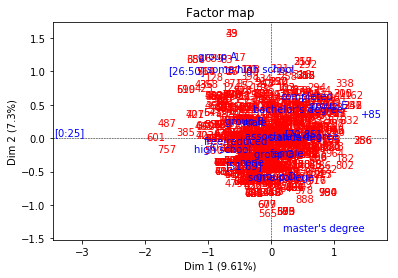

In [46]:
# Simultaneous mappingf the line and column dots
# We are representing only the two first axes
my_mca.mapping(num_x_axis=1, num_y_axis=2)

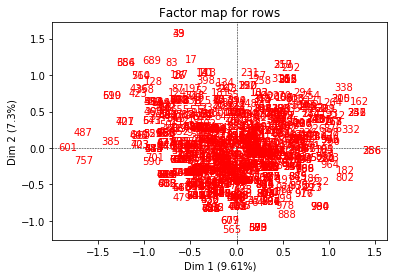

In [50]:
# Line dots mapping
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

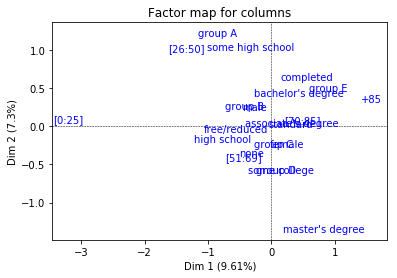

In [48]:
# Columns dots
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

In [ ]:
This graph shows a net separation between the low results at the exam and the high score: 
    - at the right of the first axe, we have the students who succed.
    - on the left, the people who missed
the second axe tends to separate the group A, with parents having low education level from the 
students having parents earning a master's degree.
Variables "preparation completed" group E and bachelor's degree are very close.
People whom their parents have a master's degree are succeding better.

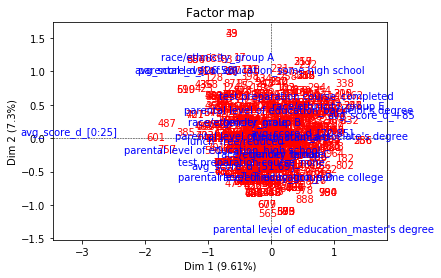

In [49]:
# The two graphs together.
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

First axe analysis - dots line

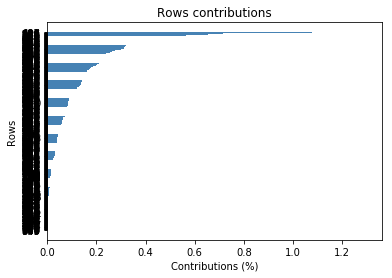

In [51]:
# Ranking of the lines point regarding their contribution to the first axis.
my_mca.plot_row_contrib(num_axis=1)

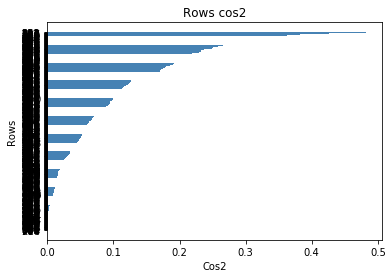

In [52]:
# Ranking of the lines point regarding their cos2 on the first axis.
my_mca.plot_row_cos2(num_axis=1)

In [ ]:
First axe analysis - dots columns

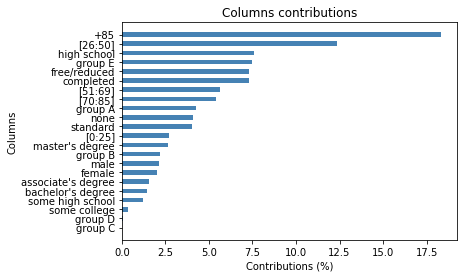

In [53]:
# Ranking of the columns dots regarding their contribution to the first axis.
my_mca.plot_col_contrib(num_axis=1)

We observe that the two scores +85 and [26:50] are opposed on the first axis 
and are contributing the most to its construction.

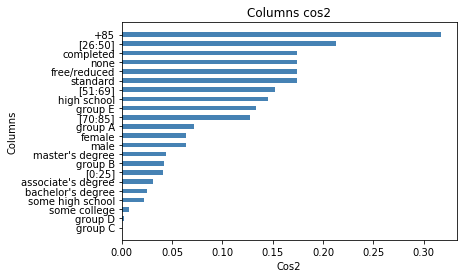

In [54]:
# Ranking of the columns dots regarding their cos2 to the first axis.
my_mca.plot_col_cos2(num_axis=1)

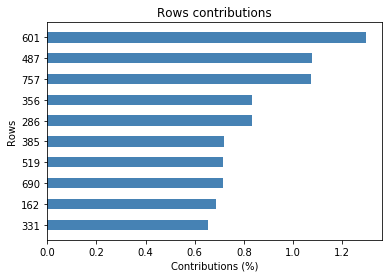

In [55]:
# Individuals who are contributing the most to the axis
my_mca.plot_row_contrib(num_axis=1, nb_values=10)

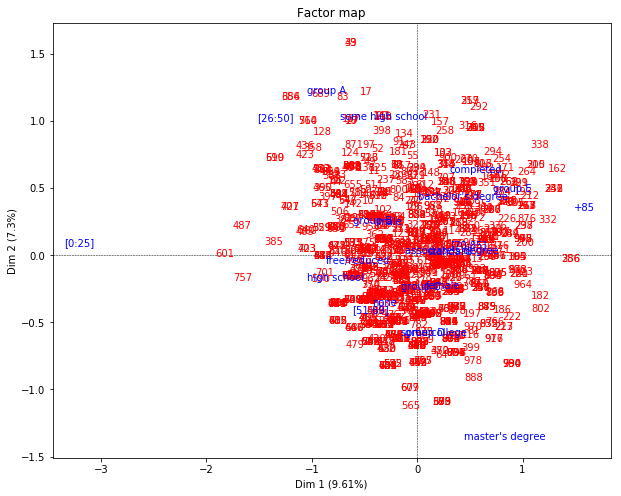

In [56]:
my_mca.mapping(1, 2, figsize=(10, 8))